### Python Version

In [1]:
import sys
sys.version

'3.7.3 (default, Jul 25 2020, 13:03:44) \n[GCC 8.3.0]'

### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Versions of used Modules

In [3]:
print('{:<10} {:>10}'.format('numpy',np.__version__))
print('{:<10} {:>10}'.format('pandas',pd.__version__))
print('{:<10} {:>10}'.format('matplotlib',matplotlib.__version__))
print('{:<10} {:>10}'.format('sklearn',sklearn.__version__))

numpy          1.19.0
pandas          1.1.1
matplotlib      3.3.1
sklearn        0.23.2


### Collect Data

In [4]:
train_data = pd.read_csv('~/Jupyter Projects/EICT Kanpur/train.csv')
test_data = pd.read_csv('~/Jupyter Projects/EICT Kanpur/test.csv')

### Analyzing data

In [5]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William H enry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Fill missing values

In [11]:
print('Average age of people : ',train_data['Age'].mean())

Average age of people :  29.69911764705882


In [12]:
train_values = {'Age':train_data['Age'].mean()}
test_values =  {'Age':test_data['Age'].mean(), 'Fare':test_data['Fare'].mean()}
train_data = train_data.fillna(value=train_values)
test_data =  test_data.fillna(value=test_values)

In [13]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### delete 'Cabin' column

In [15]:
del train_data['Cabin']

In [16]:
del test_data['Cabin']

In [17]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William H enry",male,35.0,0,0,373450,8.0500,S


In [48]:
def transform(gender):
    if gender=='female':
        return 0
    else:
        return 1
        
train_data['Sex'] = train_data['Sex'].apply(transform)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William H enry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


In [49]:
# train_data.groupby(['Embarked'],axis=1)

In [50]:
total_women = train_data[train_data['Sex']==1]

In [51]:
len(total_women)

891

### Data Visualizations

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

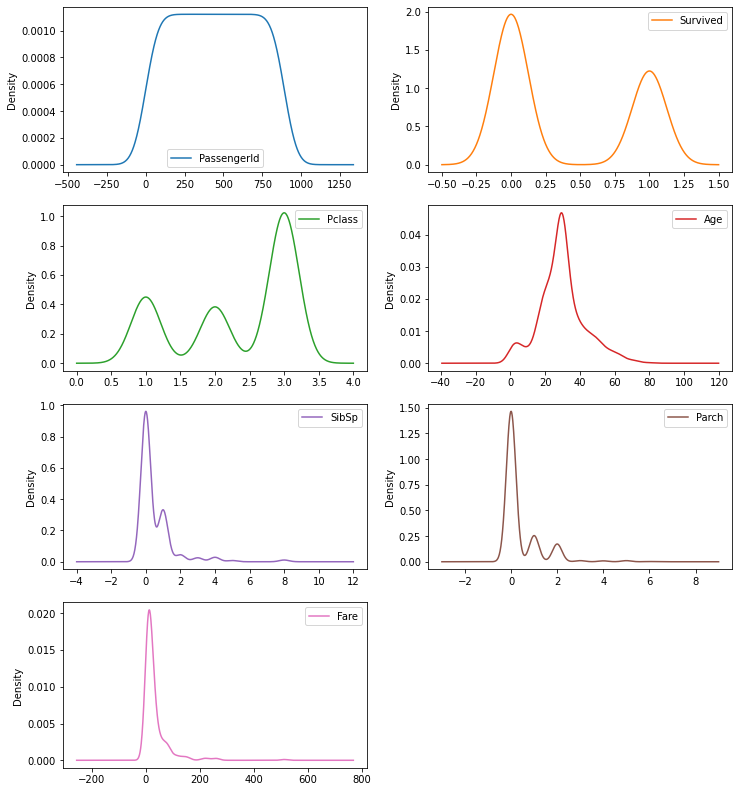

In [20]:
train_data.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,14),sharex=False)

In [21]:
X_train = train_data.drop(columns=['Survived','PassengerId','Name','Ticket','Embarked','Sex'])

In [22]:
X_test = test_data.drop(columns=['PassengerId','Name','Ticket','Embarked','Sex'])

In [23]:
Y_train = train_data['Survived']

In [24]:
X_train

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
...,...,...,...,...,...
886,2,27.000000,0,0,13.0000
887,1,19.000000,0,0,30.0000
888,3,29.699118,1,2,23.4500
889,1,26.000000,0,0,30.0000


In [25]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [26]:
# Build the model
logistic_classifier_model = LogisticRegression()

In [27]:
logistic_classifier_model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
Y_pred = logistic_classifier_model.predict(X_test)

In [29]:
# print("Accuracy : ",accuracy_score(Y_test,Y_pred))

In [30]:
logistic_classifier_model.score(X_train,Y_train)

0.7048260381593715